# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
The aim of this exercise is to compute the following 1D integral with the Monte Carlo method: $I = \int_0^1 g(x)dx=\int_0^1 \frac{\pi}{2}\cos(\frac{\pi x}{2}) dx = 1$.
    
To do so, one can use two different sampling methods; we want to compare them.

- **Uniform sampling**
<br />Random variables $x_i$ are drawn $M$ times from a uniform ditribution in $[0,1]$ and are used to estimate the integral as $I=\frac{1}{M} \sum_{i=1}^M g(x_i)$.
    
    
- **Importance sampling**
<br /> Random variables are drawn $M$ times in $[0,1]$ from a non-uniform probability distribution $d(x)$, which is more similar to the intgrand $g(x)$ than the uniform, to reduce the variance of the estimation; it also has to be positive ($d(x)\ge0 \ \ \forall x\in [0,1] $) and normalized ($\int_{0}^{1}d(x)dx=1$). 
<br />In this case, a good choice of $d(x)$ is a linear function that is normalized and has the same boundary values of $g(x)$, $(0;\pi/2)$ and $(1,0)$: $d(x)=2(1-x)$. So we consider a new integrand: $$g'(x)=\frac{g(x)}{d(x)}=\frac{\frac{\pi}{2}\cos(\frac{\pi x}{2})}{2(1-x)}$$
and we draw the random numbers from $d(x)$ using the cumulative inversion method:
$$F(x)=\int_{0}^{x} d(x') dx'=2(x-\frac{x^2}{2})=: r \quad \rightarrow \quad x=1-\sqrt{1-r}$$
where only the negative solution is considered, since $x$ has to be in the interval $[0,1]$, and $r$ are random uiformly distributed variables.
<br />The estimation of the integral is computed as $I=\frac{1}{M} \sum_{i=1}^M \frac{g(x_i)}{d(x_i)}$.


In both cases we consider $M=10^4$ throws and the uncertainties are computed with the blocking method.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

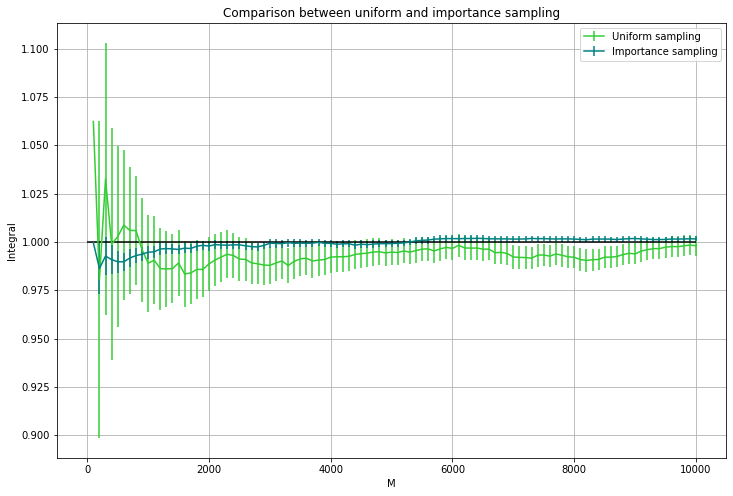

In [2]:
x1,y1,err1=np.loadtxt("2.1/int_uniform.out",usecols=(0,1,2),unpack=True)
x2,y2,err2=np.loadtxt("2.1/int_importance.out",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(12, 8))
plt.errorbar(x1,y1,yerr=err1, color='limegreen', label="Uniform sampling")
plt.errorbar(x2,y2,yerr=err2, color='teal', label="Importance sampling")
plt.hlines(1, 0, 10000)
plt.title('Comparison between uniform and importance sampling')
plt.xlabel('M')
plt.ylabel('Integral')
plt.grid(True) 
plt.legend()

plt.show()

We can see that the importance sampling method makes the estimation of $I$ converge to its expected value more quickly and with smaller uncertainties, if compared to the uniform sampling method.

### Exercise 02.2
    
We simulate 3D Random Walks (RW) on a cubic lattice and in the continuum, always starting at the origin.
<br />Our aim is to evaluate $r_{RMS}=\sqrt{\langle |\vec{r}_s|^2 \rangle_{RW}}$, the quadratic mean of the distance from the origin, with its statistical uncertainty, as function of the step $s\in [0,10^2]$. We also wanto to verify that it actually describes a diffusive behaviour, and so that it fits a function like: $f(s)= k\sqrt{s}$.

In fact, a 1D (but this can be extended to 3D) Random Walk describes a path that consists of a succession of random steps. It is a Markovian process, as every step only depends on the previous one. If we consider the continuum limit, with lenght of the steps $a \rightarrow 0$ and time of each step $\tau \rightarrow 0$, the probability $p_1(x,t)$ to find the walk in the position $x$ at the time $t$ is described by the diffusion equation:
$$ \frac{\partial p_1(x,t)}{\partial t} = D \frac{\partial^2 p_1(x,t)}{\partial x^2}$$
with $D = \frac{a^2}{2\tau}$. The solution of this equation considering $p_1(x, t=0)=\delta(x)$ is:
$$p_1(x,t)= \frac{1}{\sqrt{4\pi D t}} e^{\frac{-x^2}{4Dt}}$$
a Gaussian with $\mu=0$ and $\sigma^2=2Dt$.

If we consider a 1D Randow Walk, the position after $N$ steps is $S_N = \sum_{i=1}^N x_i$, where $x_i$ is a random variable distributed as $p(x)=\frac{1}{2}[\delta(x+a)+\delta(x-a)]$ (with mean zero and variance $a$, representing a 1D random walk). <br>For the Central Limit Theorem, $P_N(S_N)$ tends towards a Gaussian distribution with mean $<S_N>=0$ and variance ${\sigma _{S_N}}^2=Na^2$. Then, a standard deviation described by a function like $\sigma = a \sqrt{N}$ is typical of diffusive processes. <br>Moreover, note that, if compared to the Gaussian obtained from the diffusion equation, $Na^2=2Dt$.

The experiment is repeated $M=10^4$ times and the blocking method is used to compute the uncertainties.

**Part 1: discrete Random Walk**
    
We study a Random Walk on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a random forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$.

In particular, we draw a random number from a uniform distribution in $[0,3)$, representing one of the three directions: $x$ if extracted in $[0,1)$, $y$ if in $[1,2)$, $z$ if in $[2,3)$; then we draw a random number from a uniform distribution in $[0,2)$ representing the orientation: forward if extracted in $[0,1)$, backward if in $[1,2)$.

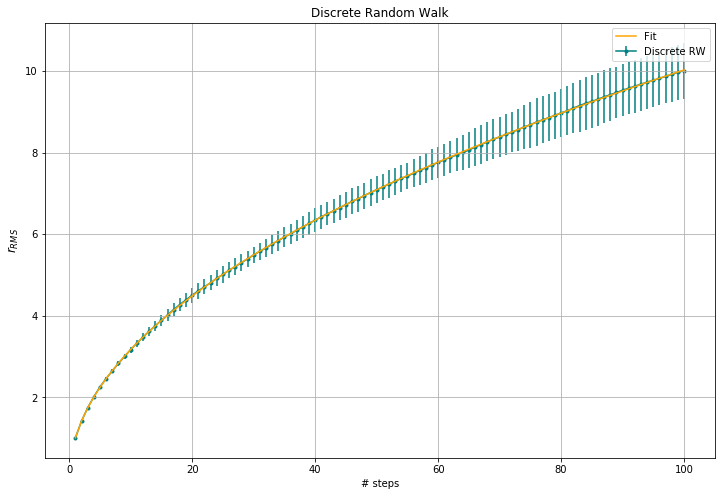

The fit function is: f(s)=k √s with k= 1.002947113318593


In [3]:
def f (x, k):
    return k * np.sqrt(x)

x,y,err=np.loadtxt("2.2/rw_discrete.out",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(12, 8))
plt.errorbar(x,y,yerr=err, color='teal', label='Discrete RW', marker='.', zorder=1)
plt.title('Discrete Random Walk')
plt.xlabel('# steps')
plt.ylabel('$r_{RMS}$', fontsize=12)
plt.grid(True) 

#fitting
popt, pcov = curve_fit(f, x, y)
plt.plot(x,f(x,*popt), color='orange', label='Fit', zorder=2)

plt.legend()
plt.show()

print('The fit function is: f(s)=k √s with k=',popt[0])

We can say then that this process can be considered a diffusive one.

**Part 2: continuous Random Walk**
    
We study a Random Walk in the continuum; at each discrete time the walker makes a step of length  $a=1$ along a random direction obtained by sampling uniformly the solid angle, $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$, with the method of the inversion of the cumulative distribution ($\theta=\arccos(1-2r)$ with $r$ uniformly distributed).

In fact, in order to compute the distance from the origin of the RW, we consider the polar coordinate system:

$$\begin{cases} x = a \ sin\theta \ cos\phi 
\\ y = a \ sin\theta \ sin\phi  
\\ z = a \ cos\theta \end{cases}$$

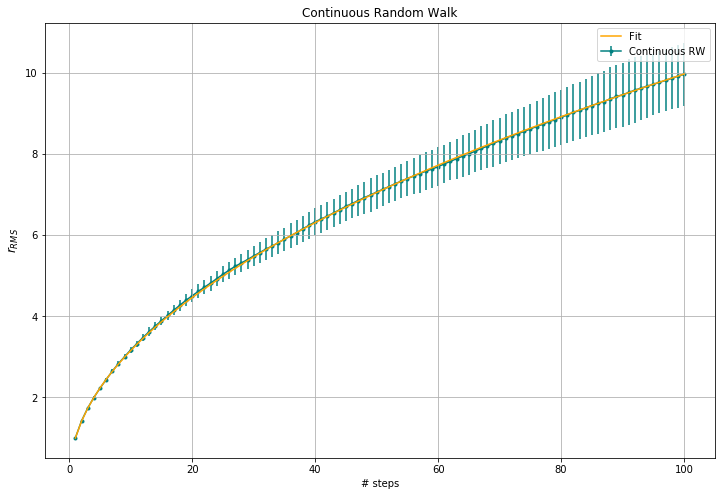

The fit function is: f(s)=k √s with k= 0.9972190328195197


In [4]:
x,y,err=np.loadtxt("2.2/rw_continuous.out",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(12, 8))
plt.errorbar(x,y,yerr=err, color='teal', label='Continuous RW', marker='.', zorder=1)
plt.title('Continuous Random Walk')
plt.xlabel('# steps')
plt.ylabel('$r_{RMS}$', fontsize=12)
plt.grid(True) 

#fitting
popt, pcov = curve_fit(f, x, y)
plt.plot(x,f(x,*popt), color='orange', label='Fit', zorder=2)

plt.legend()
plt.show()

print('The fit function is: f(s)=k √s with k=',popt[0])

Our Random Walk simulation can be then considered a diffusive process.